<a href="https://colab.research.google.com/github/Rebtem/potato-diseases-model/blob/main/PSOCNNMODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape, num_classes, conv_filters, dense_units, dropout_rate):
    model = Sequential([
        Conv2D(conv_filters, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
train_dir = "/content/drive/MyDrive/potato_dataset/Train"
test_dir = "/content/drive/MyDrive/potato_dataset/Test"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 64  # or 128
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 922 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
def create_cnn_model(input_shape, num_classes, conv_filters, dense_units, dropout_rate):
    model = Sequential([
        Conv2D(conv_filters, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
def evaluate_model(params):
    conv_filters = int(params[0])
    dense_units = int(params[1])
    dropout_rate = params[2]

    model = create_cnn_model((img_size, img_size, 3), train_data.num_classes, conv_filters, dense_units, dropout_rate)
    history = model.fit(train_data, epochs=3, validation_data=test_data, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    return -val_acc  # minimize negative accuracy


In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=dfef99f7f86c6f8db33c1bdf43afb521febb41b9b8a50d7774996565c519db10
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [ ]:
from pyswarm import pso

lb = [16, 32, 0.2]   # lower bounds
ub = [64, 256, 0.5]  # upper bounds

best_params, best_score = pso(evaluate_model, lb, ub, swarmsize=5, maxiter=5)
print("Best Hyperparameters:", best_params)


NameError: name 'Sequential' is not defined

In [ ]:
from pyswarm import pso

lb = [16, 32, 0.2]   # lower bounds
ub = [64, 256, 0.5]  # upper bounds

best_params, best_score = pso(evaluate_model, lb, ub, swarmsize=5, maxiter=5)
print("Best Hyperparameters:", best_params)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Stopping search: maximum iterations reached --> 5
Best Hyperparameters: [24.84930156 90.32994551  0.39018899]


In [ ]:
model = create_cnn_model((img_size, img_size, 3), train_data.num_classes,
                         int(best_params[0]), int(best_params[1]), best_params[2])
model.fit(train_data, epochs=10, validation_data=test_data)


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 352ms/step - accuracy: 0.3359 - loss: 2.3010 - val_accuracy: 0.3767 - val_loss: 0.9654
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 307ms/step - accuracy: 0.5912 - loss: 0.9029 - val_accuracy: 0.7000 - val_loss: 0.6814
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 282ms/step - accuracy: 0.6365 - loss: 0.7872 - val_accuracy: 0.6333 - val_loss: 0.6586
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.6566 - loss: 0.6963 - val_accuracy: 0.8367 - val_loss: 0.4951
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 325ms/step - accuracy: 0.6960 - loss: 0.6312 - val_accuracy: 0.8500 - val_loss: 0.4188
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.7626 - loss: 0.5450 - val_accuracy: 0.7833 - val_loss: 0.4812
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.7847 - loss: 0.4868 - val_accuracy: 0.8933 - val_loss: 0.3513
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.7661 - loss: 0.4813 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/potato_cnn_pso_model.h5')


In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9544 - loss: 0.2529
Test Accuracy: 0.9333


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load saved model
model = load_model('/content/drive/MyDrive/potato_cnn_pso_model.h5')

# Load and preprocess a new image
img_path = '/content/drive/MyDrive/potato_leaves/eb.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]
print(f"Predicted class: {predicted_class}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/potato_leaves/eb.jpg'

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load saved model
model = load_model('/content/drive/MyDrive/potato_cnn_pso_model.h5')

# Load and preprocess a new image
img_path = '/content/drive/MyDrive/potato_leaves/test'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]
print(f"Predicted class: {predicted_class}")


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/potato_leaves/test'

In [ ]:
# Load saved model
model = load_model('/content/drive/MyDrive/potato_cnn_pso_model.h5')

In [ ]:
import numpy as np


In [ ]:
# Load and preprocess a new image
img_path = '/content/drive/MyDrive/potato_leaves/test/eb.JPG'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
class_labels = list(train_data.class_indices.keys())


In [ ]:
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class: Potato___Early_blight


In [ ]:
# Load and preprocess image
img_path = '/content/drive/MyDrive/potato_leaves/test/leaf.JPG'  # replace with a real file
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
# Predict
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: Potato___healthy


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# ── 3. Get model predictions on the ENTIRE test set ────────────────────
#     ‑‑ shuffle = False so labels stay in order
test_data.reset()                      # start at first batch
y_prob = model.predict(test_data, verbose=1)     # probabilities
y_pred = np.argmax(y_prob, axis=1)               # predicted class index
y_true = test_data.classes                       # true class index

NameError: name 'test_data' is not defined

In [ ]:
test_data.reset()

NameError: name 'test_data' is not defined

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,                 # e.g. "/content/drive/MyDrive/potato_dataset/Test"
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False             # IMPORTANT: keep order fixed for metrics
)


NameError: name 'ImageDataGenerator' is not defined

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # ← NEW LINE

In [ ]:
# ── 2. Re‑declare the test generator ───────────────────────────────────
test_dir = "/content/drive/MyDrive/potato_dataset/Test"  # adjust if different

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False        # keep order fixed
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/potato_dataset/Test'

In [ ]:
import os, textwrap

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [ ]:
# ── 2. Re‑declare the test generator ───────────────────────────────────
test_dir = "/content/drive/MyDrive/potato_dataset/Test"  # adjust if different

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False        # keep order fixed
)

Found 300 images belonging to 3 classes.


In [ ]:
# ── 3. Get model predictions on the ENTIRE test set ────────────────────
#     ‑‑ shuffle = False so labels stay in order
test_data.reset()                      # start at first batch
y_prob = model.predict(test_data, verbose=1)     # probabilities
y_pred = np.argmax(y_prob, axis=1)               # predicted class index
y_true = test_data.classes                       # true class index


NameError: name 'model' is not defined

In [ ]:
from tensorflow.keras.models import load_model

model_path = "/content/drive/MyDrive/potato_cnn_pso_model.h5"   # adjust if different
model = load_model(model_path)

In [ ]:
# ── 3. Get model predictions on the ENTIRE test set ────────────────────
#     ‑‑ shuffle = False so labels stay in order
test_data.reset()                      # start at first batch
y_prob = model.predict(test_data, verbose=1)     # probabilities
y_pred = np.argmax(y_prob, axis=1)               # predicted class index
y_true = test_data.classes                       # true class index

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 7s/step


In [ ]:
# ── 4. Human‑readable class names (same order as training) ─────────────
class_labels = list(test_data.class_indices.keys())

In [ ]:
# ── 5. Precision, Recall, F1, Support for each class ───────────────────
print(classification_report(
        y_true, y_pred,
        target_names=class_labels,
        digits=4))

                       precision    recall  f1-score   support

Potato___Early_blight     0.9706    0.9900    0.9802       100
 Potato___Late_blight     0.9000    0.9000    0.9000       100
     Potato___healthy     0.9286    0.9100    0.9192       100

             accuracy                         0.9333       300
            macro avg     0.9331    0.9333    0.9331       300
         weighted avg     0.9331    0.9333    0.9331       300



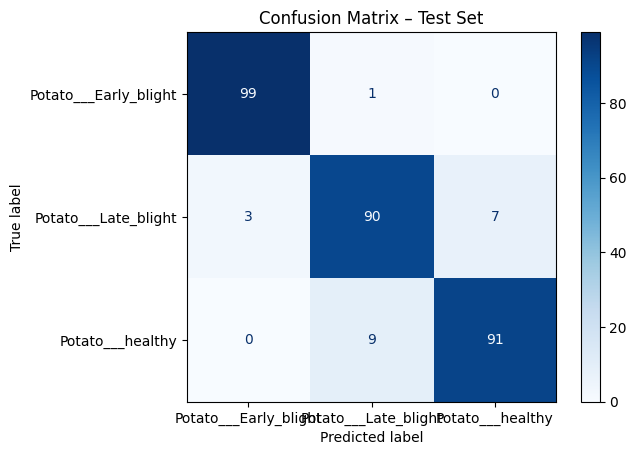

In [ ]:
# ── 6. (Optional) Confusion‑matrix plot ────────────────────────────────
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=class_labels
                      ).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix – Test Set")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/potato_cnn_pso_model.h5')

In [ ]:
model.summary

<bound method Model.summary of <Sequential name=sequential_30, built=True>>

In [ ]:
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 62, 62, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 31, 31, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_30 (Flatten)            │ (None, 23064)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 90)             │     2,075,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 3)              │           273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,076,797 (7.92 MB)

 Trainable params: 2,076,795 (7.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model.save("potato_model.h5")


In [ ]:
from google.colab import files
files.download('potato_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('potato_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
# app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model("potato_model.h5")

# Define class names (update as per your training)
class_names = ['potato__Early_blight', 'potato__Late_blight', 'potato__healthy']

# Streamlit UI
st.title("Potato Disease Detection 🌿🥔")
st.write("Upload a potato leaf image to predict the disease class.")

# File uploader
uploaded_file = st.file_uploader("Choose a leaf image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    img = Image.open(uploaded_file).convert("RGB")
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Preprocess image
    img = img.resize((64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    predicted_label = class_names[class_index]
    confidence = prediction[0][class_index]

    st.markdown(f"### 🧪 Prediction: **{predicted_label}**")
    st.markdown(f"### 📊 Confidence: **{confidence*100:.2f}%**")


2025-05-22 09:12:20.551 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 09:12:20.795 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-22 09:12:20.796 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 09:12:20.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 09:12:20.798 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 09:12:20.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 09:12:20.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 09:12:20.802 Thread 'MainThread': mi